<h1>Introduction</h1>

<p>This notebook was inspired by an episode of the Joe Rogan podcast featuring Gad Saad. Gad claims at one point in the episode to be curious about the length of a Yelp review vs. the amount of negativity in it. He posits that the longer a review, the more likely it is to be a negative review, so I thought there would definitely be a dataset out there of Yelp reviews and thought to put the hypothesis to the test!</p>

<h1>Contents</h1>

<ol>
    <li>Imports</li>
    <li>Initial Dataset Exploration</li>
    <li>Initial Hypothesis Testing</li>
    <li>Checking Random Reviews</li>
    <li>Wordclouds</li>
    <li>Searching for Specific Word Use</li>
</ol>

<h2>Imports</h2>

<p>Extremely basic set of imports here. the most important ones are gonna be pandas and seaborn. I'm sort of making this to get a bit more accustomed to data visualization with seaborn so I'll try to be using that a bit more frequently.</p>

In [492]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import random

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [493]:
import_rows = 800000

df = pd.read_csv(
    'yelp_review.csv',
    nrows=import_rows,
)

<h2>Initial Dataset Exploration</h2>

<p>Just checking some random things for the dataset. Pandas provides a couple of functions that make this decently easy so we canjust sort of characterize the dataset for ourselves before we dive in.</p>

In [494]:
df.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0
3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,0,0,0
4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28,Had their chocolate almond croissant and it wa...,0,0,0


In [495]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 9 columns):
review_id      800000 non-null object
user_id        800000 non-null object
business_id    800000 non-null object
stars          800000 non-null int64
date           800000 non-null object
text           800000 non-null object
useful         800000 non-null int64
funny          800000 non-null int64
cool           800000 non-null int64
dtypes: int64(4), object(5)
memory usage: 54.9+ MB


In [496]:
df.describe()

,stars,useful,funny,cool
count,800000.000000,800000.000000,800000.000000,800000.000000
mean,3.731506,1.332845,0.471001,0.546007
std,1.438039,4.283348,2.574510,2.389817
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,0.000000,0.000000
75%,5.000000,2.000000,0.000000,1.000000
max,5.000000,1456.000000,681.000000,245.000000


<h2>Initial Hypothesis Testing</h2>

<p>The goal of this section is two-fold. First to characterize the word count for every review and then to actually take some statistics for these reviews splitting between number of stars. The main hypothesis that we're testing is that as number of stars goes down, wordcount should increase, or otherwise one star reviews should represent the largest wordcount.</p>

In [497]:
df['word_count'] = df['text'].str.count(' ') + 1

     
Of the 800000 total imported reviews:     
111828 reviews had 1 star.     
67017 reviews had 2 stars.    
91395 reviews had 3 stars.    
183642 reviews had 4 stars.    
346118 reviews had 5 stars.



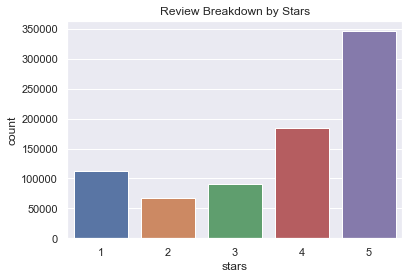

In [498]:
sns.countplot(df['stars']).set_title('Review Breakdown by Stars')
total_reviews = import_rows

one_star = df[df.stars == 1].reset_index()
one_star_count = one_star.count()['stars']

two_star = df[df['stars'] == 2].reset_index()
two_star_count = two_star.count()['stars']

three_star =  df[df['stars'] == 3].reset_index()
three_star_count = three_star.count()['stars']

four_star = df[df['stars'] == 4].reset_index()
four_star_count = four_star.count()['stars']

five_star = df[df['stars'] == 5].reset_index()
five_star_count = five_star.count()['stars']

print(' \
    \nOf the %d total imported reviews: \
    \n%d reviews had 1 star. \
    \n%d reviews had 2 stars.\
    \n%d reviews had 3 stars.\
    \n%d reviews had 4 stars.\
    \n%d reviews had 5 stars.\n' \
    % (total_reviews, one_star_count, two_star_count, three_star_count, four_star_count, five_star_count))

In [499]:
star_dfs = [one_star, two_star, three_star, four_star, five_star]

medians = [x['word_count'].median() for x in star_dfs]
print('The median amount of words in a one star review was %d' % (medians[0]))
print('The median amount of words in a two star review was %d' % (medians[1]))
print('The median amount of words in a three star review was %d' % (medians[2]))
print('The median amount of words in a four star review was %d' % (medians[3]))
print('The median amount of words in a five star review was %d' % (medians[4]))

means = [x['word_count'].mean() for x in star_dfs]
print('\nThe mean amount of words in a one star review was %.2f' % (means[0]))
print('The mean amount of words in a two star review was %.2f' % (means[1]))
print('The mean amount of words in a three star review was %.2f' % (means[2]))
print('The mean amount of words in a four star review was %.2f' % (means[3]))
print('The mean amount of words in a five star review was %.2f' % (means[4]))

maxes = [x['word_count'].max() for x in star_dfs]
print('\nThe largest amount of words in a one star review was %d' % (maxes[0]))
print('The largest amount of words in a two star review was %d' % (maxes[1]))
print('The largest amount of words in a three star review was %d' % (maxes[2]))
print('The largest amount of words in a four star review was %d' % (maxes[3]))
print('The largest amount of words in a five star review was %d' % (maxes[4]))

stdevs = [x['word_count'].std() for x in star_dfs]
print('\nThe standard deviation of words in a one star review was %.2f' % (stdevs[0]))
print('The standard deviation of words in a two star review was %.2f' % (stdevs[1]))
print('The standard deviation of words in a three star review was %.2f' % (stdevs[2]))
print('The standard deviation of words in a four star review was %.2f' % (stdevs[3]))
print('The standard deviation of words in a five star review was %.2f' % (stdevs[4]))

long_one_star = one_star[one_star['word_count'] > 100]
long_two_star = two_star[two_star['word_count'] > 100]
long_three_star = three_star[three_star['word_count'] > 100]
long_four_star = four_star[four_star['word_count'] > 100]
long_five_star = five_star[five_star['word_count'] > 100]

print('\nThe amount of one star reviews with over 100 words was %d' % (len(long_one_star)))
print('The amount of two star reviews with over 100 words was %d' % (len(long_two_star)))
print('The amount of three star reviews with over 100 words was %d' % (len(long_three_star)))
print('The amount of four star reviews with over 100 words was %d' % (len(long_four_star)))
print('The amount of five star reviews with over 100 words was %d' % (len(long_five_star)))

The median amount of words in a one star review was 104
The median amount of words in a two star review was 108
The median amount of words in a three star review was 102
The median amount of words in a four star review was 86
The median amount of words in a five star review was 65

The mean amount of words in a one star review was 146.28
The mean amount of words in a two star review was 144.08
The mean amount of words in a three star review was 134.11
The mean amount of words in a four star review was 116.57
The mean amount of words in a five star review was 91.18

The largest amount of words in a one star review was 1065
The largest amount of words in a two star review was 1662
The largest amount of words in a three star review was 1006
The largest amount of words in a four star review was 1580
The largest amount of words in a five star review was 1118

The standard deviation of words in a one star review was 136.27
The standard deviation of words in a two star review was 124.14
The s

<h3>Some Intermediate Conclusions</h3>

<p>It looks like there's some interesting correlation showing up here. Let's analyze that a bit! Starting with median we see what appears to be a generally negative trend. It appears that the median amount of words decreases as people like a service more and more which holds with Gad's hypothesis on the show. The same holds for the mean values.</p>

<p>Interestingly enough, the longest reviews by a max value are some of the higher star reviews, but these may be outliers. We'll plot this further later. What I thought was more interesting were the last two readouts here. With the standard deviation we see a negative correlation meaning that as you increase the amuont of stars for a review, the volatility of the length of the review goes down. This means that if you give a one star review on Yelp you're going to either leave a novel of a rant, or a simple three word phrase! The last statistics is interesting because it doesn't support our hypothesis at all. There are much more five star reviews with over 100 words compared to reviews with one star! This is a really interesting result that we'll investigate after we inspect the actual trends that we just observed.<p>

Mean squared error: 2.12 words
r2 Value: 0.99


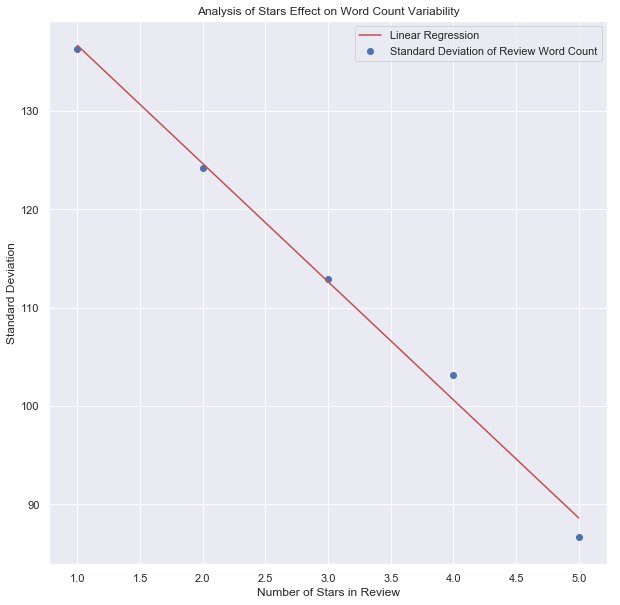

In [500]:
fig, ax = plt.subplots(figsize=(10,10))

x_values = np.array([(x+1, x+1) for x, val in enumerate(stdevs)])
stdevs_Y = np.array([(x+1, val) for x,val in enumerate(stdevs)])

regr = linear_model.LinearRegression()
regr.fit(x_values, stdevs_Y)

x_list = range(1,len(actual)+1)
predicted = regr.predict(x_values)
predicted = [x[1] for x in predicted]
actual = [x[1] for x in stdevs_Y]

plt.plot(x_list, predicted, 'r-')
plt.scatter(x_list, actual)

plt.xlabel('Number of Stars in Review')
plt.ylabel('Standard Deviation')
plt.title('Analysis of Stars Effect on Word Count Variability')
plt.legend([ 'Linear Regression', 'Standard Deviation of Review Word Count'])

print("Mean squared error: %.2f words" % mean_squared_error(actual, predicted))
print('r2 Value: %.2f' % r2_score(actual, predicted))

Mean squared error: 41.60 words
r2 Value: 0.90


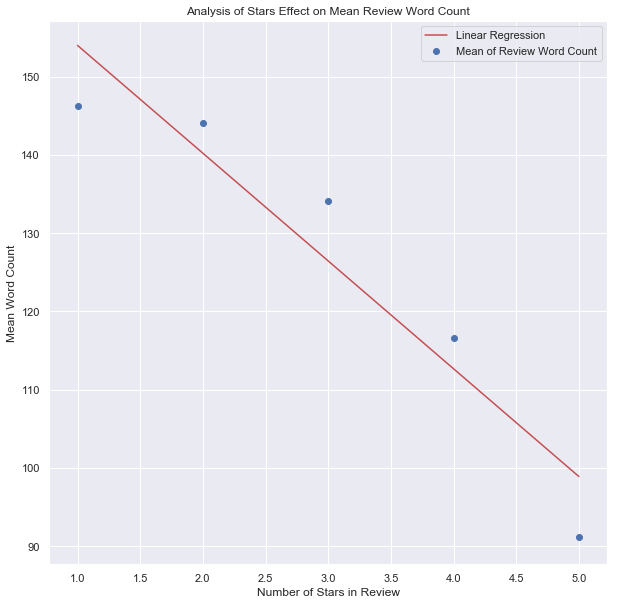

In [501]:
fig, ax = plt.subplots(figsize=(10,10))

x_values = np.array([(x+1, x+1) for x, val in enumerate(means)])
means_Y = np.array([(x+1, val) for x,val in enumerate(means)])

regr = linear_model.LinearRegression()
regr.fit(x_values, means_Y)

x_list = range(1,len(actual)+1)
predicted = regr.predict(x_values)
predicted = [x[1] for x in predicted]
actual = [x[1] for x in means_Y]

plt.plot(x_list, predicted, 'r-')
plt.scatter(x_list, actual)

plt.xlabel('Number of Stars in Review')
plt.ylabel('Mean Word Count')
plt.title('Analysis of Stars Effect on Mean Review Word Count')
plt.legend([ 'Linear Regression', 'Mean of Review Word Count'])

print("Mean squared error: %.2f words" % mean_squared_error(actual, predicted))
print('r2 Value: %.2f' % r2_score(actual, predicted))

Mean squared error: 52.00 words
r2 Value: 0.79


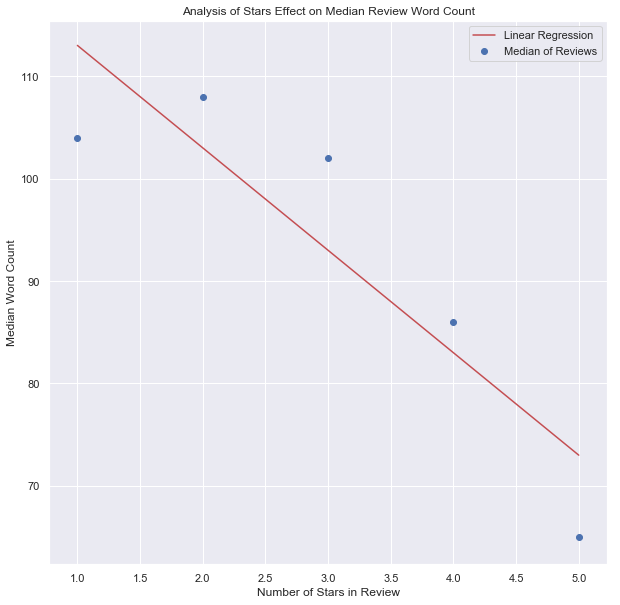

In [502]:
fig, ax = plt.subplots(figsize=(10,10))

x_values = np.array([(x+1, x+1) for x, val in enumerate(medians)])
medians_Y = np.array([(x+1, val) for x,val in enumerate(medians)])

regr = linear_model.LinearRegression()
regr.fit(x_values, medians_Y)

x_list = range(1,len(actual)+1)
predicted = regr.predict(x_values)
predicted = [x[1] for x in predicted]
actual = [x[1] for x in medians_Y]

plt.plot(x_list, predicted, 'r-')
plt.scatter(x_list, actual)

plt.xlabel('Number of Stars in Review')
plt.ylabel('Median Word Count')
plt.title('Analysis of Stars Effect on Median Review Word Count')
plt.legend([ 'Linear Regression', 'Median of Reviews'])

print("Mean squared error: %.2f words" % mean_squared_error(actual, predicted))
print('r2 Value: %.2f' % r2_score(actual, predicted))

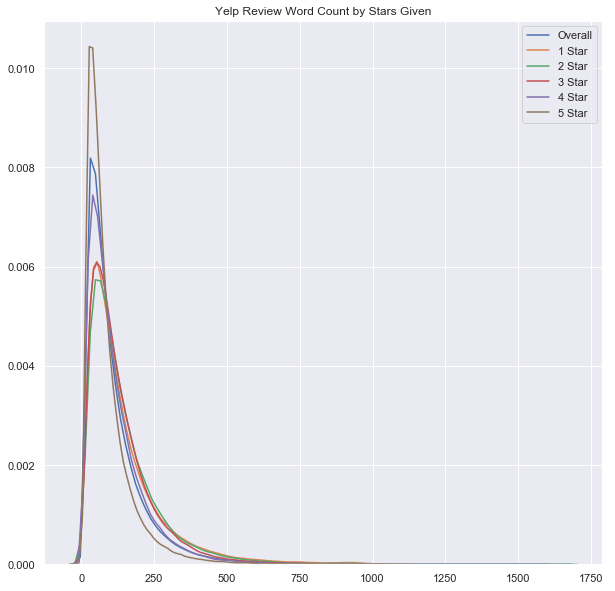

In [503]:
fig, ax = plt.subplots(figsize=(10,10))

overall_plot = sns.kdeplot(df['word_count']).set_title('Yelp Review Word Count by Stars Given')
one_star_plot = sns.kdeplot(one_star['word_count'], ax=ax)
two_star_plot = sns.kdeplot(two_star['word_count'], ax=ax)
three_star_plot = sns.kdeplot(three_star['word_count'], ax=ax)
four_star_plot = sns.kdeplot(four_star['word_count'], ax=ax)
five_star_plot = sns.kdeplot(five_star['word_count'], ax=ax)

plt.legend(['Overall','1 Star','2 Star','3 Star','4 Star','5 Star'])

<h2>Checking Random Reviews</h2>

In [504]:
print('Random 1 Star Review: \n')
one_star['text'][random.randint(1,one_star_count)]

Random 1 Star Review: 



'Biggest bunch of liars I\'ve dealt with in a long time. "Go ahead and take the car and call in for an appointment and we\'ll fix the scratches". Made an appointment (after I drove it off the lot) and was then told "oh no, that is too deep of a scratch. You\'ll have to take it to a body shop to get it repaired at your expense". I have not yet put 1000 miles on the car and the sound system sounds like a loose speaker wire. Took it in and was told by the service manager that it would be a "$130.00 diagnostic fee" for them to even look at it. While buying the car I told them repeatedly that I did not want their car theft, leather and paint protectant plans. They added them to the price of the car anyway for $1800.00. When I said no they said they\'d have to start all over with the negotiations of the price and they ended up charging me anyway. No information about extended warranty-said they couldn\'t provide me with that. I should have walked away from the deal but wanted the car. Should

In [505]:
print('Random 2 Star Review: \n')
two_star['text'][random.randint(1,two_star_count)]

Random 2 Star Review: 



'I\'m a member of OTF in San Diego. I am visiting for the holiday and wanted to get a workout in. I was so surprised at how unfriendly\\/unhelpful this staff was as opposed to my home studio! They acted annoyed when I told them I had an injury and just wanted to let them know because my studio always asks if anyone needs adjustments before we begin. The instructor, Jamie, left me to do my own workout the last 15 mins as opposed to helping me with other options. Then, I let her know that my heart monitor wasn\'t working and she just said, "Oh, I guess we will need to fix that." And never followed up. My gym in San Diego is super involved and friendly and make everyone feel like they are family. No one seemed engaged and everyone seemed annoyed to be there, working. I won\'t come back here.'

In [506]:
print('Random 3 Star Review: \n')
three_star['text'][random.randint(1,three_star_count)]

Random 3 Star Review: 



"Let's cut to the chase, food is decent - okay, but nothing to run back to. \n\nThe nutella shake $6.50 is really tasty and the Gouda Mac & Cheese Bites $6.50 were good for a fried carb filled appetizer. The County Line Fried Chicken Sandwich $9.75 is pretty big, but lacking flavor. It was good after I added pepper jack cheese, extra coleslaw (they give you a micro portion), hot sauce, and some guac I had at home. \n\nI placed an in-person take-out order with the hostess who was very personable and friendly. The décor is clean and hip, and there is plenty of parking since this place is on the outside of a mall. The food isn't bad, but I've only made it here twice in the two years I've lived on the west side if that tells you anything.\n\n\n\n\nUPDATE**\nCustomer service at The Rail is outstanding! They really care about how your experience was and genuinely listen when you offer suggestions. I tried them out again, this time for a Local Yokel Burger (added avocado) and a side of their 

In [507]:
print('Random 4 Star Review: \n')
four_star['text'][random.randint(1,four_star_count)]

Random 4 Star Review: 



'Excellent copy services,cheap scans,alot of staff to help on the floor.and they have trail mix.plus its across the street from my work,sign up for the staples reward cards,it actually helps and save me alot,stay classy yelpers'

In [508]:
print('Random 5 Star Review: \n')
five_star['text'][random.randint(1,five_star_count)]

Random 5 Star Review: 



"Best Korean restaurant in town. Skip going all the way to Chinatown for a good Korean meal. This place is wonderful. Lunch buffet is great. All food is kept in the back until you ask for what you want which is great because there's no tampering with other people's food and most buffets have food sitting out for long periods of time. We tried the regular pork belly, smoked garlic pork belly, steak bulgolgi, and the beef brisket. By far the winners were smoked pork belly and steak bulgolgi. Seong was our server...great service! Prices are excellent and the food is way better than Korean restaurants in Chinatown."

In [509]:
print('Random Long 1 Star Review: \n')
long_df = one_star[one_star['word_count'] > 100].reset_index()
long_df['text'][random.randint(1,len(long_df))]

Random Long 1 Star Review: 



'Wow, was I unimpressed with this restaurant. We had a party of 6, 4 of which were very disappointed with the meal. A plain ceasar salad was $16. I had the IL Manzo (Filet Tenderloin). It was more expensive than a Kobe steak I got at Wolfgang Puck restaurant two days earlier. And the quality? Well, terrible is what comes to mind. The servers took a long time just to bring us water and was very unprofessional. \n\nWe were also told that we would get a window seat - or something near the window, and they never sat us there. \n\nI ordered a simple ceasar salad, a glass of wine, and a poorly cooked steak for $90.\n\nSave your money, go to Wolfgang Puck at MGM. Check out the fountains from the strip, they are just as amazing.'

In [510]:
print('Random Short 1 Star Review: \n')
short_df = one_star[one_star['word_count'] < 10].reset_index()
short_df['text'][random.randint(1,len(short_df))]

Random Short 1 Star Review: 



"Gross place, not attractive girls. Wouldn't visit again."

In [511]:
print('Random Funny and Short 1 Star Review: \n')
funny_short_df = one_star[one_star['word_count'] < 10].reset_index(drop=True)
funny_short_df = funny_short_df[funny_short_df['funny'] == 1].reset_index(drop=True)
funny_short_df['text'][random.randint(1,len(funny_short_df))]

Random Funny and Short 1 Star Review: 



'Generic-fill-you-up-on-the-cheapest-bulk-ingradients-we-can-find-in-the-clearance-section-of food-city-kinda-of-meal.'

In [512]:
print('Random Funny and Long 1 Star Review: \n')
funny_long_df = one_star[one_star['word_count'] > 100].reset_index(drop=True)
funny_long_df = funny_long_df[funny_long_df['funny'] == 1].reset_index(drop=True)
funny_long_df['text'][random.randint(1,len(funny_long_df))]

Random Funny and Long 1 Star Review: 



"Wish I could give 0 stars. I had been going there for years and it is nothing fancy but was a good place to go for an inexpensive cut. I never got anything fancy so I can't speak to that. However, today was the 3rd time this calendar year that I tried to go there after work and they felt a need to closer early.  I am fortunate enough to have a job and just can't be there between 10 & 4...\nHere's an idea: stop claiming you are a family salon. Stop advertising hours you don't intend on being open. Just be a place for retirees or whatever.  I know I won't waste my time heading there anytime"

<h2>Wordclouds</h2>

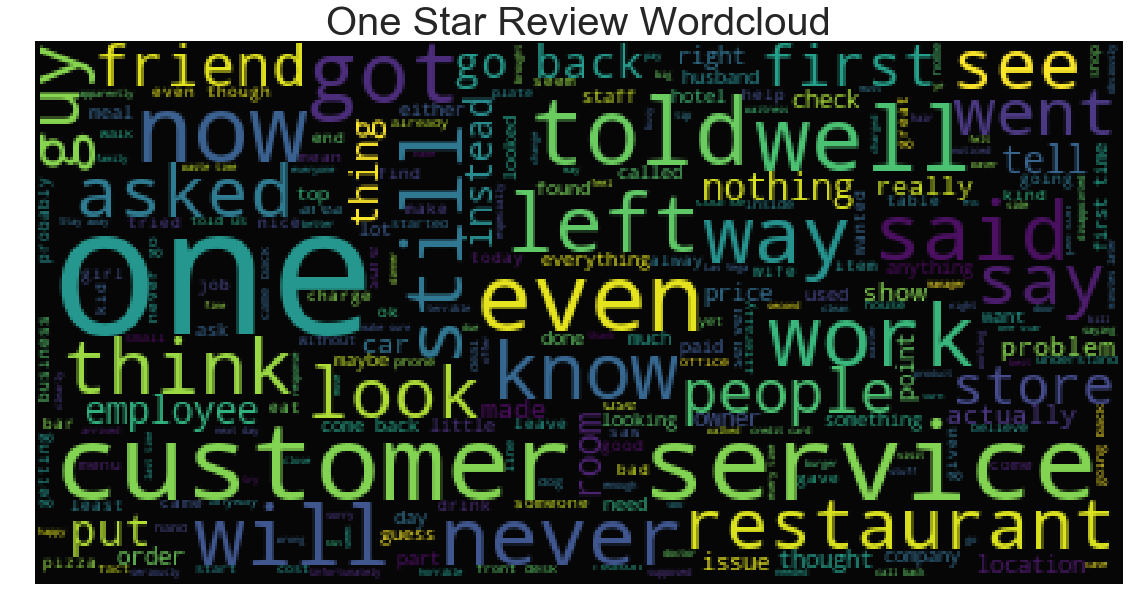

In [513]:
clean_mask = np.array(Image.open('Yelp.png'))
clean_mask = clean_mask[:,:,1]

text = one_star['text'].values

wc= WordCloud(background_color="black",max_words=2000)
wc.generate(" ".join(text))
plt.figure(figsize=(20,10))
plt.axis("off")
plt.title("One Star Review Wordcloud", fontsize=40)
plt.imshow(wc.recolor(colormap= 'viridis' , random_state=17), alpha=0.98)
plt.show()

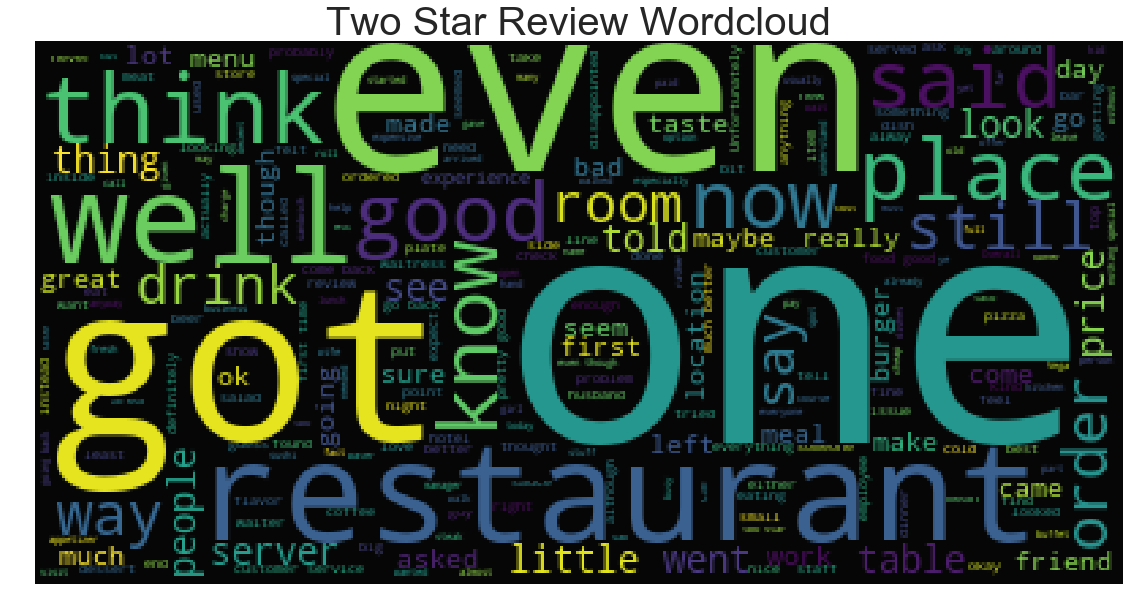

In [514]:
clean_mask = np.array(Image.open('Yelp.png'))
clean_mask = clean_mask[:,:,1]

text = two_star['text'].values

wc= WordCloud(background_color="black",max_words=2000)
wc.generate(" ".join(text))
plt.figure(figsize=(20,10))
plt.axis("off")
plt.title("Two Star Review Wordcloud", fontsize=40)
plt.imshow(wc.recolor(colormap= 'viridis' , random_state=17), alpha=0.98)
plt.show()

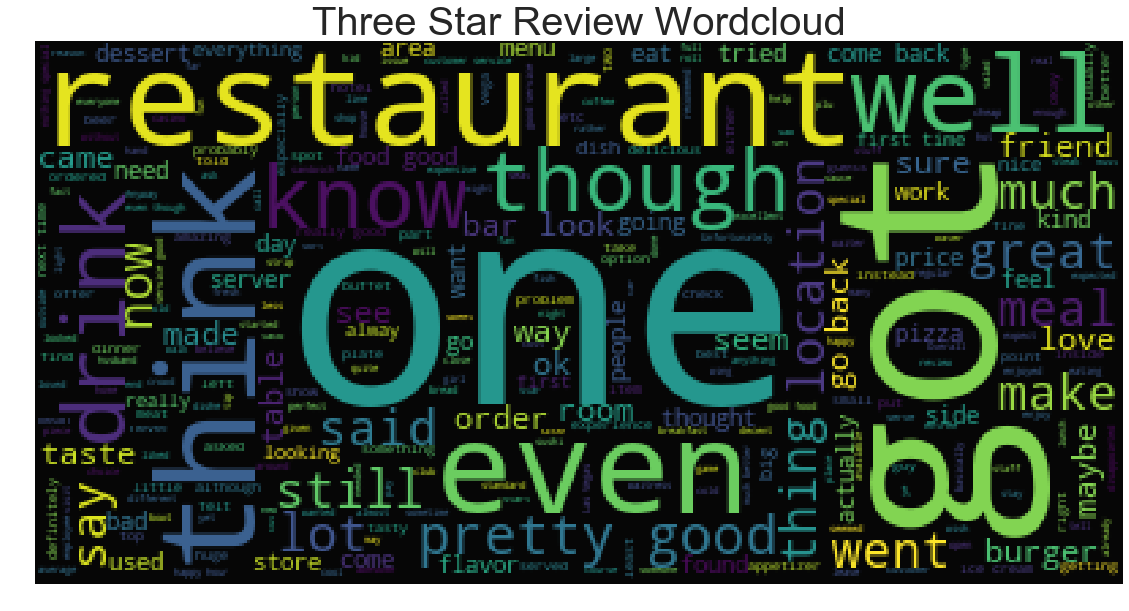

In [515]:
clean_mask = np.array(Image.open('Yelp.png'))
clean_mask = clean_mask[:,:,1]

text = three_star['text'].values

wc= WordCloud(background_color="black",max_words=2000)
wc.generate(" ".join(text))
plt.figure(figsize=(20,10))
plt.axis("off")
plt.title("Three Star Review Wordcloud", fontsize=40)
plt.imshow(wc.recolor(colormap= 'viridis' , random_state=17), alpha=0.98)
plt.show()

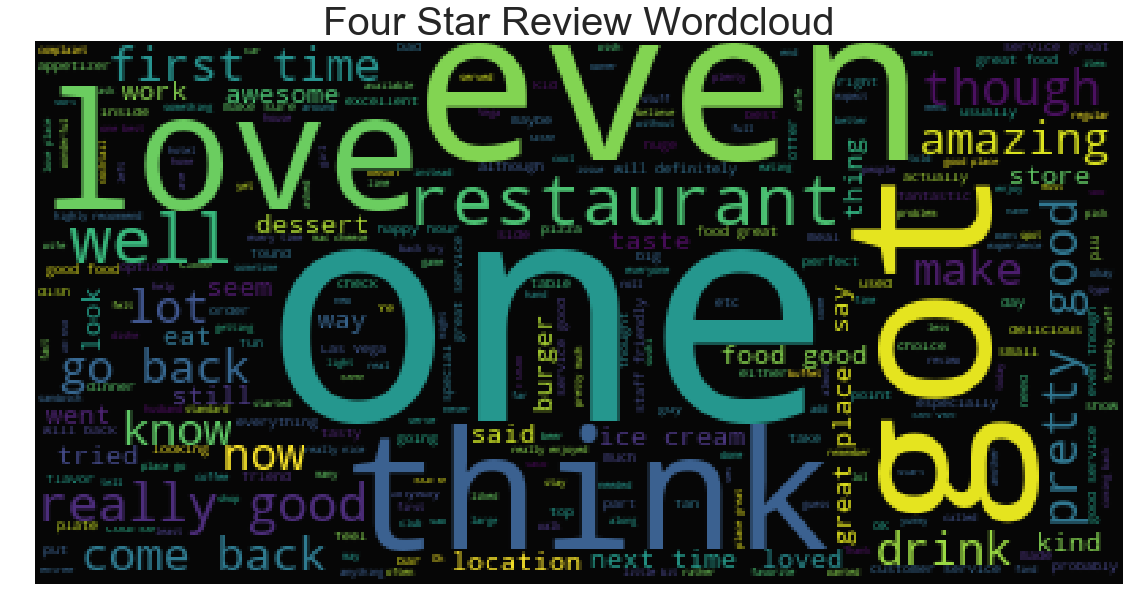

In [516]:
clean_mask = np.array(Image.open('Yelp.png'))
clean_mask = clean_mask[:,:,1]

text = four_star['text'].values

wc= WordCloud(background_color="black",max_words=2000)
wc.generate(" ".join(text))
plt.figure(figsize=(20,10))
plt.axis("off")
plt.title("Four Star Review Wordcloud", fontsize=40)
plt.imshow(wc.recolor(colormap= 'viridis' , random_state=17), alpha=0.98)
plt.show()

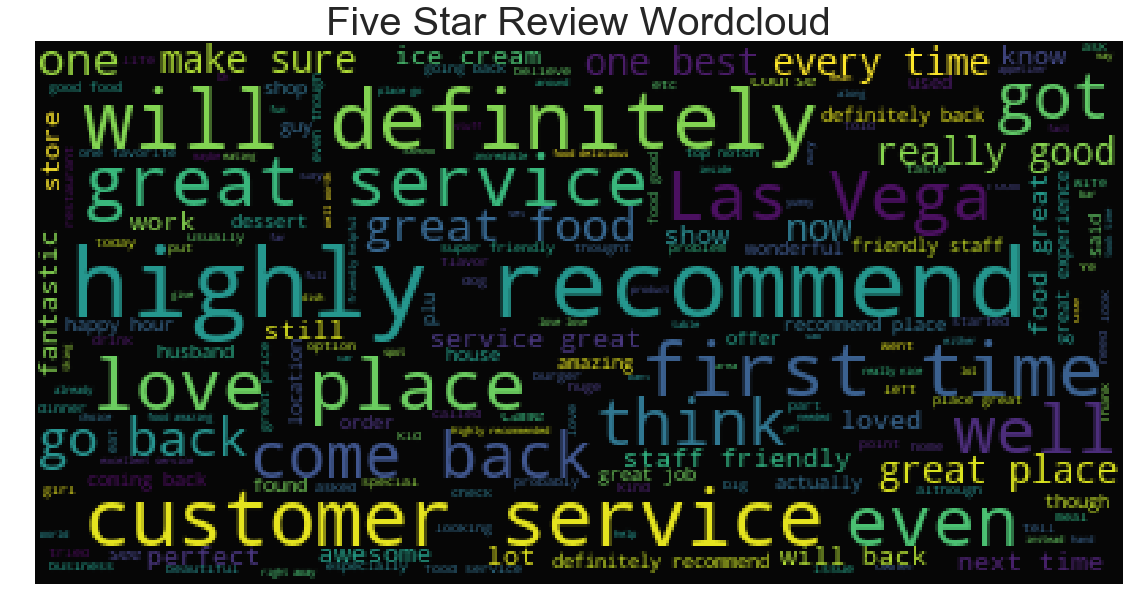

In [517]:
clean_mask = np.array(Image.open('Yelp.png'))
clean_mask = clean_mask[:,:,1]

text = five_star['text'].values

wc= WordCloud(background_color="black",max_words=2000)
wc.generate(" ".join(text))
plt.figure(figsize=(20,10))
plt.axis("off")
plt.title("Five Star Review Wordcloud", fontsize=40)
plt.imshow(wc.recolor(colormap= 'viridis' , random_state=17), alpha=0.98)
plt.show()

<h2>Specific Word Usage</h2>

In [518]:
word_choice = input('Enter the word you want to check use frequency for: ')

one_star_df = one_star[one_star['text'].str.count(word_choice) > 0].reset_index()
print('\nThe word %s showed up %d times in all one star reviews' % (word_choice, len(one_star_df)))

two_star_df = two_star[two_star['text'].str.count(word_choice) > 0].reset_index()
print('\nThe word %s showed up %d times in all two star reviews' % (word_choice, len(two_star_df)))

three_star_df = three_star[three_star['text'].str.count(word_choice) > 0].reset_index()
print('\nThe word %s showed up %d times in all three star reviews' % (word_choice, len(three_star_df)))

four_star_df = four_star[four_star['text'].str.count(word_choice) > 0].reset_index()
print('\nThe word %s showed up %d times in all four star reviews' % (word_choice, len(four_star_df)))

five_star_df = five_star[five_star['text'].str.count(word_choice) > 0].reset_index()
print('\nThe word %s showed up %d times in all five star reviews' % (word_choice, len(five_star_df)))

if len(one_star_df > 0):
    print('\n==RANDOM ONE STAR REVIEW WORD USAGE==')
    print(one_star_df['text'][random.randint(1,len(one_star_df))])

if len(one_star_df > 0):
    print('\n==RANDOM TWO STAR REVIEW WORD USAGE==')
    print(two_star_df['text'][random.randint(1,len(two_star_df))])

if len(one_star_df > 0):
    print('\n==RANDOM THREE STAR REVIEW WORD USAGE==')
    print(three_star_df['text'][random.randint(1,len(three_star_df))])

if len(one_star_df > 0):
    print('\n==RANDOM FOUR STAR REVIEW WORD USAGE==')
    print(four_star_df['text'][random.randint(1,len(four_star_df))])

if len(one_star_df > 0):
    print('\n==RANDOM FIVE STAR REVIEW WORD USAGE==')
    print(five_star_df['text'][random.randint(1,len(five_star_df))])

Enter the word you want to check use frequency for: badly

The word badly showed up 564 times in all one star reviews

The word badly showed up 253 times in all two star reviews

The word badly showed up 187 times in all three star reviews

The word badly showed up 134 times in all four star reviews

The word badly showed up 285 times in all five star reviews

==RANDOM ONE STAR REVIEW WORD USAGE==
This was our fourth try. We went to the basement resturant and had another disappointing exsperiance. 
The chubby female bartender with the side shaves head was very rude. Even though we were at a table and had our own waitress. The bartender visited our table three times to rush us with drinks and to get our check. She over charged us for her very badly made drinks.
The other staff, as always are very friendly and helpful.
The food and drinks are very over priced for what it is.
We will not be returning after this trip. We kept feeling like we should give Reynas resturant another chance, but